In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import figure
import seaborn as sns

In [9]:
turbina = pd.read_csv('T1.csv')
turbina.columns = ['Data/hora', 'ActivePower(KW)', 'WindSpeed(m/s)', 'CurvaTeórica(KWh)','DireçaoVento(º)']
turbina1 = turbina.drop('DireçaoVento(º)', axis=1)
turbina1['Data/hora'] = pd.to_datetime(turbina1['Data/hora'])
turbina1

,Data/hora,ActivePower(KW),WindSpeed(m/s),CurvaTeórica(KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


<AxesSubplot:xlabel='WindSpeed(m/s)', ylabel='ActivePower(KW)'>

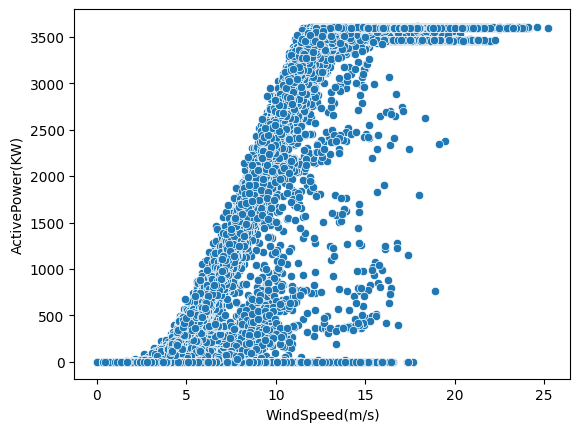

In [11]:
sns.scatterplot(data = turbina1, x = 'WindSpeed(m/s)', y = 'ActivePower(KW)')


<AxesSubplot:xlabel='WindSpeed(m/s)', ylabel='CurvaTeórica(KWh)'>

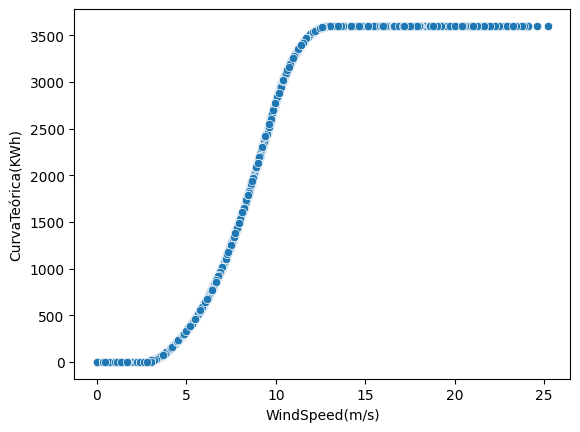

In [12]:
sns.scatterplot(data = turbina1, x = 'WindSpeed(m/s)', y = 'CurvaTeórica(KWh)')


In [23]:
pot_real = turbina1['ActivePower(KW)'].tolist()
pot_teorica = turbina1['CurvaTeórica(KWh)'].tolist()
pot_max = []
pot_min = []
dentro_limite = []

for potencia in pot_teorica:
    pot_max.append(potencia*1.05)
    pot_min.append(potencia*0.95)
  
for p, potencia in enumerate(pot_real):
  if potencia >= pot_min[p] and potencia <= pot_max[p]:
    dentro_limite.append('Dentro')
  elif potencia == 0:
    dentro_limite.append('Zero')
  else:
    dentro_limite.append('Fora')
    
    

In [24]:
turbina1['DentroLimite'] = dentro_limite
turbina1

,Data/hora,ActivePower(KW),WindSpeed(m/s),CurvaTeórica(KWh),DentroLimite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


<AxesSubplot:xlabel='WindSpeed(m/s)', ylabel='ActivePower(KW)'>

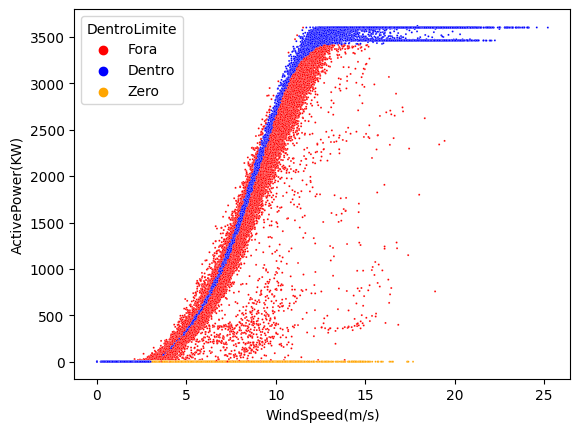

In [26]:
cores = {'Dentro':'blue', 'Fora':'red', 'Zero':'orange'}
sns.scatterplot(data = turbina1, x = 'WindSpeed(m/s)', y = 'ActivePower(KW)', hue='DentroLimite', s=2, palette=cores)
